A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.


BUSINESS GOALS
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [3]:
#importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression , Ridge, Lasso

import warnings
warnings.filterwarnings("ignore")

**READ AND UNDERSTAND DATA **

In [4]:
# Read the data
# Importing dataset

data = pd.read_csv("/Users/nivetha_official/Desktop/MLC56/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Get the information about the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Get the no. of rows and columns
data.shape

(1460, 81)

In [7]:
# Get the description of the  numerical data (Min , max, median, etc) 
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


DATA CLEANING

In [8]:
# get  the categorial column which has NA Values
cat_column = data.select_dtypes(include="object").isnull().sum()[data.select_dtypes(include="object").isnull().sum()>0].index
cat_column

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [9]:
# fill the NA with None
for col in cat_column:
    data[col] = data[col].fillna('None')


In [10]:
# drop colum which has values repeated for 85 percentage

def checkRepeatedValueMax(col):
    print("col",col)
    for i in col:
        if(data[i].value_counts().max() > (len(data) * (0.85))):
            print("i value",i)
            data.drop(i , axis=1,  inplace=True)
            
cat_colun = data.select_dtypes(include="object")
checkRepeatedValueMax(cat_colun)
    

col      MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave  None      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave  None      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave  None      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condi

In [11]:
# Get NA values for Numerical Data

num_column = data.select_dtypes(include=['int',"float"]).isnull().sum()[data.select_dtypes(include=['int',"float"]).isnull().sum()>0].index
num_column

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [12]:
# LotFrontage  , MasVnrArea fill with median
data["LotFrontage"] = data["LotFrontage"].fillna(data["LotFrontage"].median())
data["MasVnrArea"] = data["MasVnrArea"].fillna(data["MasVnrArea"].median())

In [13]:
# GarageYrBlt with 0
data["GarageYrBlt"] = data["GarageYrBlt"].fillna(0)

In [14]:
# drop colum which has values repeated for 85 percentage

def checkRepeatedValueMax(col):
    print("col",col)
    for i in col:
        if(data[i].value_counts().max() > (len(data) * (0.85))):
            print("i value",i)
            data.drop(i , axis=1,  inplace=True)
            
num_colun = data.select_dtypes(include=['int',"float"])
checkRepeatedValueMax(num_colun)

col         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003    

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

In [16]:
# YrSold, YearBuilt, YearRemodAdd , GarageYrBlt , MoSold

# Check whether Remodelling is done by creating new column IsRemodeled
def checkIsRemodeled(row):
   if row["YearBuilt"] == row["YearRemodAdd"]:
      return 0
   elif row["YearBuilt"] < row["YearRemodAdd"]:
      return 1
   else:
      return 2
      

data["IsRemodeled"] = data.apply(checkIsRemodeled, axis=1)
data["IsRemodeled"].value_counts()

0    764
1    696
Name: IsRemodeled, dtype: int64

In [17]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [18]:
# Check the Age of the building

def checkAge(row):
    if row["YearBuilt"] == row["YearRemodAdd"]:
        return row["YrSold"] - row["YearBuilt"]
    else:
        return row["YrSold"] - row["YearRemodAdd"]
   

data["BuildingAge"] = data.apply(checkAge,axis=1)
data["BuildingAge"].value_counts()

 0     124
 1      87
 4      63
 3      53
 2      52
 56     52
 5      46
 57     43
 8      42
 6      40
 59     39
 7      38
 10     38
 9      38
 58     37
 11     29
 12     28
 13     28
 31     28
 14     27
 39     24
 36     22
 16     21
 15     21
 37     20
 32     19
 60     19
 30     17
 44     17
 47     16
 42     16
 53     16
 29     15
 34     15
 48     14
 51     14
 45     13
 33     13
 40     13
 38     13
 41     12
 18     12
 19     11
 49     11
 46     11
 21     10
 17     10
 43     10
 52     10
 35      9
 54      9
 50      9
 20      9
 28      9
 22      8
 27      8
 25      7
 26      7
 24      6
 23      6
 55      5
-1       1
Name: BuildingAge, dtype: int64

In [19]:
#Check garage is old or new
data["GarageYrBlt"].value_counts()

def checkForNewGarage(row):
    if row == 0:
        return 0
    elif row >= 1991 and row <= 2000:
        return 0
    else:
        return 1
data["ISNewGarage"] = data["GarageYrBlt"].apply(checkForNewGarage)
data["ISNewGarage"]

0       1
1       1
2       1
3       0
4       0
5       0
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      0
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      0
37      1
38      1
39      0
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      0
49      1
50      0
51      1
52      1
53      1
54      1
55      1
56      0
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      0
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      0
73      1
74      1
75      1
76      1
77      1
78      0
79      1
80      1
81      0
82      1
83      1
84      0
85      0
86      1
87      1
88      0
89      0
90      1
91      1
92      1
93      1
94      0
95      0
96      0
97      1
98      1
99      0


In [20]:
drop_col = ["YrSold", "YearBuilt", "YearRemodAdd" , "GarageYrBlt" , "MoSold"]
data.drop(drop_col,axis=1,inplace=True)


In [21]:
data.shape

(1460, 49)

In [22]:
count_v = round(100*(data.isnull().sum()/len(data)),2)
count_v.index
count_v.values 
  
gg = pd.DataFrame({"index" :count_v.index , "values" :count_v.values})
gg

,index,values
0,Id,0.0
1,MSSubClass,0.0
2,MSZoning,0.0
3,LotFrontage,0.0
4,LotArea,0.0
5,LotShape,0.0
6,LotConfig,0.0
7,Neighborhood,0.0
8,BldgType,0.0
9,HouseStyle,0.0


In [23]:
data[data.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodeled,BuildingAge,ISNewGarage


In [24]:
data.describe([.25,.5,.75,.90,.98,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodeled,BuildingAge,ISNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.802740
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.398067
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,1.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,1.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
98%,1430.820000,188.200000,120.820000,25251.620000,9.000000,8.000000,650.820000,1442.640000,1678.200000,2001.640000,2072.280000,1318.560000,2782.380000,1.000000,3.000000,1.000000,4.000000,10.820000,2.000000,3.000000,907.460000,430.100000,240.820000,394931.060000,1.000000,59.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


In [25]:
data.shape

(1460, 49)

DATA VISUALIZATION

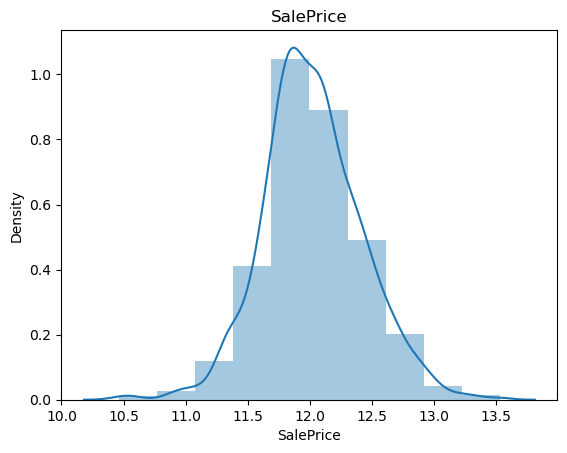

In [26]:
data['SalePrice'] = np.log1p(data['SalePrice'])

plt.title('SalePrice')
sns.distplot(data['SalePrice'], bins=10)
plt.show()

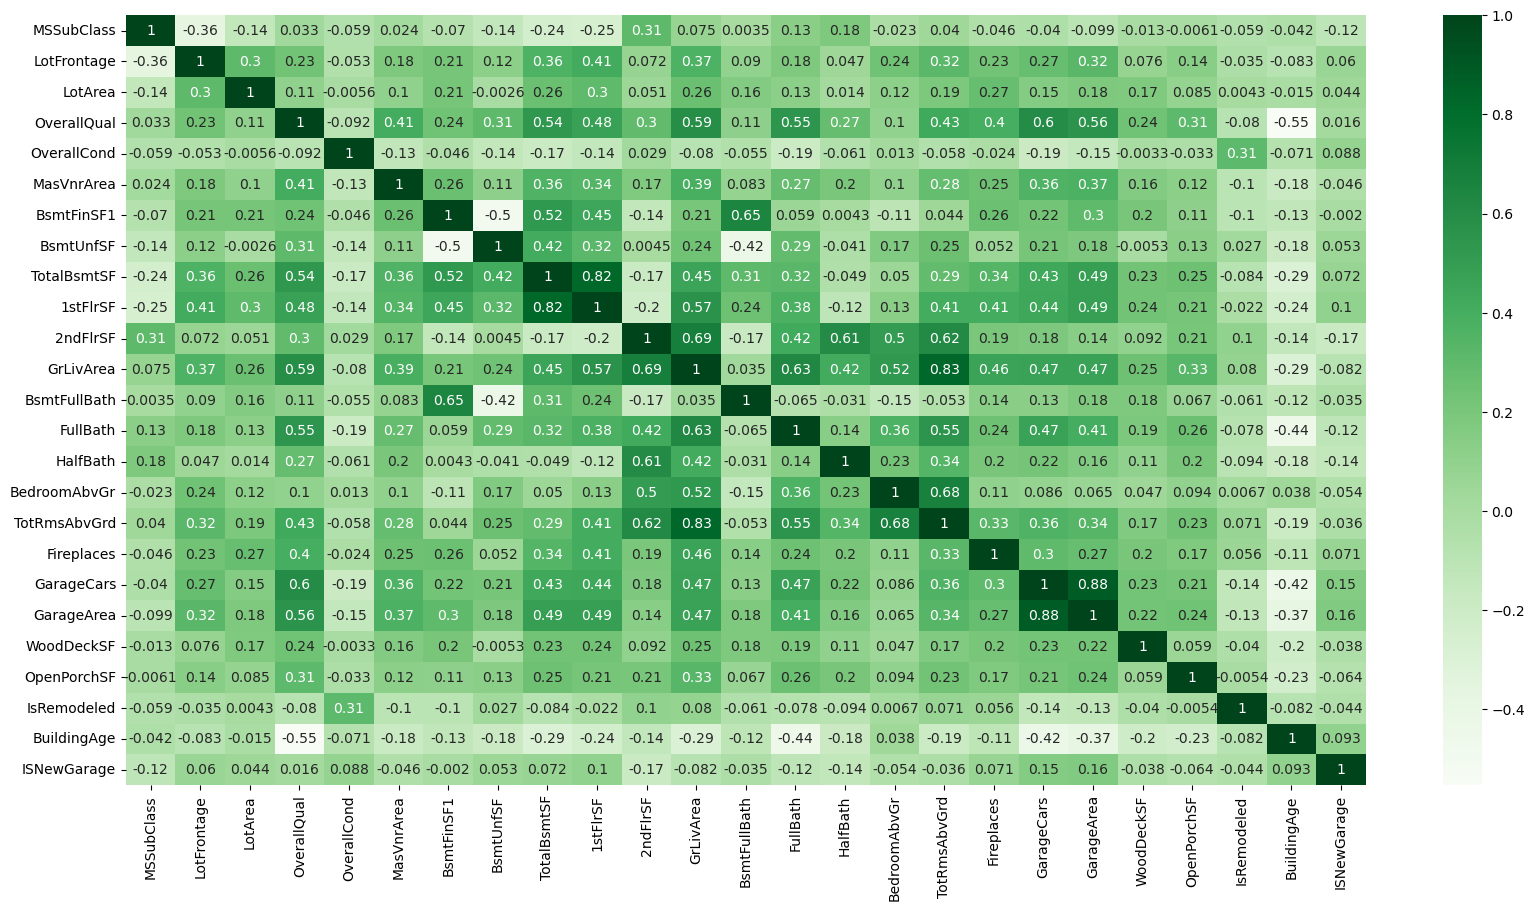

In [27]:
plt.figure(figsize = (20, 10))
num_colun = data.select_dtypes(include=['int',"float"])
num_colun.drop(["Id","SalePrice"],axis=1, inplace=True)
sns.heatmap(num_colun.corr(), annot = True, cmap="Greens")
plt.show()

In [28]:
data.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [29]:
data.drop(["Id"], axis = 1, inplace = True)

In [30]:
data.shape

(1460, 46)

DATA PREPARATION

In [31]:
data['temp_LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
data['temp_ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data['temp_BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['temp_BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
data['temp_BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
data['temp_HeatingQC'] = data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['temp_KitchenQual'] = data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['temp_FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['temp_GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
data['temp_BldgType'] = data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
data['temp_HouseStyle'] = data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
data['temp_Fence'] = data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
data['temp_LotConfig'] = data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
data['temp_MasVnrType'] = data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
data['temp_SaleCondition'] = data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodeled,BuildingAge,ISNewGarage,temp_LotShape,temp_ExterQual,temp_BsmtQual,temp_BsmtExposure,temp_BsmtFinType1,temp_HeatingQC,temp_KitchenQual,temp_FireplaceQu,temp_GarageFinish,temp_BldgType,temp_HouseStyle,temp_Fence,temp_LotConfig,temp_MasVnrType,temp_SaleCondition
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,0,None,Attchd,RFn,2,0,61,None,Normal,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,298,0,None,Normal,12.109016,0,31,1,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,0,42,None,Normal,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,0,35,None,Abnorml,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,192,84,None,Normal,12.429220,0,8,0,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   MSZoning            1460 non-null   object 
 2   LotFrontage         1460 non-null   float64
 3   LotArea             1460 non-null   int64  
 4   LotShape            1460 non-null   object 
 5   LotConfig           1460 non-null   object 
 6   Neighborhood        1460 non-null   object 
 7   BldgType            1460 non-null   object 
 8   HouseStyle          1460 non-null   object 
 9   OverallQual         1460 non-null   int64  
 10  OverallCond         1460 non-null   int64  
 11  RoofStyle           1460 non-null   object 
 12  Exterior1st         1460 non-null   object 
 13  Exterior2nd         1460 non-null   object 
 14  MasVnrType          1460 non-null   object 
 15  MasVnrArea          1460 non-null   float64
 16  ExterQ

In [33]:
data = data.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodeled,BuildingAge,ISNewGarage,temp_LotShape,temp_ExterQual,temp_BsmtQual,temp_BsmtExposure,temp_BsmtFinType1,temp_HeatingQC,temp_KitchenQual,temp_FireplaceQu,temp_GarageFinish,temp_BldgType,temp_HouseStyle,temp_Fence,temp_LotConfig,temp_MasVnrType,temp_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,31,1,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,0,8,0,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1


In [34]:
data = pd.get_dummies(data, drop_first=True)


In [35]:
data.shape

(1460, 112)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 549.1 KB


TRAIN & SPLIT THE DATA

In [37]:
df_train , df_test = train_test_split(data , train_size=0.7 , random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 112)
(439, 112)


Scaling - 

In [38]:
scalar = MinMaxScaler()
df_train[data.columns] = scalar.fit_transform(df_train[data.columns])

df_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodeled,BuildingAge,ISNewGarage,temp_LotShape,temp_ExterQual,temp_BsmtQual,temp_BsmtExposure,temp_BsmtFinType1,temp_HeatingQC,temp_KitchenQual,temp_FireplaceQu,temp_GarageFinish,temp_BldgType,temp_HouseStyle,temp_Fence,temp_LotConfig,temp_MasVnrType,temp_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
318,0.235294,0.236301,0.039403,0.666667,0.500,0.16,0.174876,0.154110,0.220458,0.231481,0.616949,0.424289,0.333333,0.666667,0.5,0.500,0.333333,0.75,0.396733,0.114723,0.653233,0.0,0.278689,0.0,1.0,0.666667,0.8,1.00,1.000000,1.00,0.666667,0.6,0.666667,0.00,0.428571,0.0,1.00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
239,0.176471,0.106164,0.033981,0.555556,0.375,0.00,0.016655,0.274401,0.120295,0.098611,0.333656,0.201576,0.000000,0.333333,0.5,0.375,0.333333,0.25,0.000000,0.267686,0.382174,1.0,1.000000,1.0,1.0,0.333333,0.6,0.25,0.333333,0.50,0.333333,0.8,0.333333,0.00,0.285714,0.5,1.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
986,0.176471,0.130137,0.017931,0.555556,0.875,0.00,0.000000,0.207620,0.079378,0.145602,0.307022,0.230015,0.000000,0.333333,0.0,0.250,0.000000,0.25,0.459743,0.000000,0.393490,1.0,0.065574,1.0,1.0,0.333333,0.6,0.25,0.166667,0.75,0.666667,0.0,0.333333,0.00,0.285714,0.0,0.75,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1416,1.000000,0.133562,0.046139,0.333333,0.625,0.00,0.000000,0.332620,0.127169,0.202315,0.505569,0.355880,0.000000,0.666667,0.0,0.500,0.000000,0.50,0.000000,0.000000,0.408432,1.0,1.000000,1.0,1.0,0.333333,0.6,0.25,0.166667,0.75,0.333333,0.0,0.333333,0.25,0.428571,0.0,1.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [39]:
# X_train , y_train
y_train = df_train.pop("SalePrice")
X_train = df_train
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,IsRemodeled,BuildingAge,ISNewGarage,temp_LotShape,temp_ExterQual,temp_BsmtQual,temp_BsmtExposure,temp_BsmtFinType1,temp_HeatingQC,temp_KitchenQual,temp_FireplaceQu,temp_GarageFinish,temp_BldgType,temp_HouseStyle,temp_Fence,temp_LotConfig,temp_MasVnrType,temp_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
318,0.235294,0.236301,0.039403,0.666667,0.500,0.16,0.174876,0.154110,0.220458,0.231481,0.616949,0.424289,0.333333,0.666667,0.5,0.500,0.333333,0.75,0.396733,0.114723,0.0,0.278689,0.0,1.0,0.666667,0.8,1.00,1.000000,1.00,0.666667,0.6,0.666667,0.00,0.428571,0.0,1.00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
239,0.176471,0.106164,0.033981,0.555556,0.375,0.00,0.016655,0.274401,0.120295,0.098611,0.333656,0.201576,0.000000,0.333333,0.5,0.375,0.333333,0.25,0.000000,0.267686,1.0,1.000000,1.0,1.0,0.333333,0.6,0.25,0.333333,0.50,0.333333,0.8,0.333333,0.00,0.285714,0.5,1.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
986,0.176471,0.130137,0.017931,0.555556,0.875,0.00,0.000000,0.207620,0.079378,0.145602,0.307022,0.230015,0.000000,0.333333,0.0,0.250,0.000000,0.25,0.459743,0.000000,1.0,0.065574,1.0,1.0,0.333333,0.6,0.25,0.166667,0.75,0.666667,0.0,0.333333,0.00,0.285714,0.0,0.75,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1416,1.000000,0.133562,0.046139,0.333333,0.625,0.00,0.000000,0.332620,0.127169,0.202315,0.505569,0.355880,0.000000,0.666667,0.0,0.500,0.000000,0.50,0.000000,0.000000,1.0,1.000000,1.0,1.0,0.333333,0.6,0.25,0.166667,0.75,0.333333,0.0,0.333333,0.25,0.428571,0.0,1.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [40]:
y_train.head()

318     0.653233
239     0.382174
986     0.393490
1416    0.408432
390     0.399003
Name: SalePrice, dtype: float64

In [41]:
df_test[data.columns] = scalar.transform(df_test[data.columns])
df_test.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodeled,BuildingAge,ISNewGarage,temp_LotShape,temp_ExterQual,temp_BsmtQual,temp_BsmtExposure,temp_BsmtFinType1,temp_HeatingQC,temp_KitchenQual,temp_FireplaceQu,temp_GarageFinish,temp_BldgType,temp_HouseStyle,temp_Fence,temp_LotConfig,temp_MasVnrType,temp_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
1436,0.000000,0.133562,0.035192,0.333333,0.625,0.00000,0.109142,0.106164,0.141408,0.113889,0.000000,0.081860,0.000000,0.333333,0.0,0.375,0.000000,0.50,0.000000,0.000000,0.403078,0.0,0.606557,1.0,1.000000,0.333333,0.6,0.25,0.833333,0.50,0.333333,0.0,0.333333,0.0,0.000000,0.75,0.25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
57,0.235294,0.232877,0.047566,0.666667,0.500,0.00000,0.000000,0.368151,0.140753,0.112963,0.416465,0.246349,0.000000,0.666667,0.5,0.375,0.000000,0.50,0.000000,0.133843,0.562146,0.0,0.049180,1.0,0.666667,0.666667,0.8,0.25,0.166667,1.00,0.666667,0.0,0.666667,0.0,0.428571,0.00,0.75,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
780,0.000000,0.143836,0.029930,0.666667,0.500,0.02375,0.000000,0.529538,0.202455,0.203935,0.000000,0.156610,0.000000,0.666667,0.0,0.375,0.333333,0.50,0.256709,0.040153,0.526307,1.0,0.196721,0.0,1.000000,0.333333,0.8,0.25,0.166667,0.75,0.333333,0.6,1.000000,0.0,0.000000,0.00,1.00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
382,0.235294,0.198630,0.036338,0.666667,0.500,0.00000,0.000000,0.401969,0.153682,0.131250,0.415496,0.261145,0.000000,0.666667,0.5,0.375,0.000000,0.50,0.168028,0.101338,0.589137,0.0,0.032787,1.0,0.666667,0.666667,0.8,0.75,0.166667,1.00,0.666667,0.0,0.666667,0.0,0.428571,0.00,1.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [42]:
# X_train , y_train
y_test = df_test.pop("SalePrice")
X_test = df_test
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,IsRemodeled,BuildingAge,ISNewGarage,temp_LotShape,temp_ExterQual,temp_BsmtQual,temp_BsmtExposure,temp_BsmtFinType1,temp_HeatingQC,temp_KitchenQual,temp_FireplaceQu,temp_GarageFinish,temp_BldgType,temp_HouseStyle,temp_Fence,temp_LotConfig,temp_MasVnrType,temp_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
1436,0.000000,0.133562,0.035192,0.333333,0.625,0.00000,0.109142,0.106164,0.141408,0.113889,0.000000,0.081860,0.000000,0.333333,0.0,0.375,0.000000,0.50,0.000000,0.000000,0.0,0.606557,1.0,1.000000,0.333333,0.6,0.25,0.833333,0.50,0.333333,0.0,0.333333,0.0,0.000000,0.75,0.25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
57,0.235294,0.232877,0.047566,0.666667,0.500,0.00000,0.000000,0.368151,0.140753,0.112963,0.416465,0.246349,0.000000,0.666667,0.5,0.375,0.000000,0.50,0.000000,0.133843,0.0,0.049180,1.0,0.666667,0.666667,0.8,0.25,0.166667,1.00,0.666667,0.0,0.666667,0.0,0.428571,0.00,0.75,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
780,0.000000,0.143836,0.029930,0.666667,0.500,0.02375,0.000000,0.529538,0.202455,0.203935,0.000000,0.156610,0.000000,0.666667,0.0,0.375,0.333333,0.50,0.256709,0.040153,1.0,0.196721,0.0,1.000000,0.333333,0.8,0.25,0.166667,0.75,0.333333,0.6,1.000000,0.0,0.000000,0.00,1.00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
382,0.235294,0.198630,0.036338,0.666667,0.500,0.00000,0.000000,0.401969,0.153682,0.131250,0.415496,0.261145,0.000000,0.666667,0.5,0.375,0.000000,0.50,0.168028,0.101338,0.0,0.032787,1.0,0.666667,0.666667,0.8,0.75,0.166667,1.00,0.666667,0.0,0.666667,0.0,0.428571,0.00,1.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [43]:
y_test.head()

1436    0.403078
57      0.562146
780     0.526307
382     0.589137
1170    0.516932
Name: SalePrice, dtype: float64

In [44]:
X_train.shape

(1021, 111)

In [45]:
#Use RFE to get the most imp features

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [46]:
y_train_pred = lm.predict(X_train)
y_train_pred

array([0.73456316, 0.41115985, 0.47413426, ..., 0.66037186, 0.37846038,
       0.63891534])

In [47]:
y_test_pred = lm.predict(X_test)
y_test_pred

array([ 3.79327645e-01,  5.39343038e-01,  5.29995467e-01,  5.65679650e-01,
        4.70564278e-01,  6.85219479e-01,  5.85210590e-01,  6.50311304e-01,
        3.77631261e-01,  5.04440574e-01,  5.65796520e-01,  5.71985770e-01,
        4.93035696e-01,  6.02580832e-01,  3.78339320e-01,  3.93401924e-01,
        5.17477920e-01,  3.58611863e-01,  4.00024542e-01,  4.06702191e-01,
        4.82260462e-01,  3.62120308e-01,  4.46558048e-01,  3.86051346e-01,
        5.46089255e-01,  4.64706119e-01,  1.78211303e-01,  2.98580909e-01,
        5.75851327e-01,  4.52018211e-01,  4.58496263e-01,  5.57593192e-01,
        6.22515095e-01,  3.40354607e-01,  4.16157774e-01,  2.71310420e-01,
        3.94808482e-01,  3.05642684e-01,  4.50827133e-01,  3.78510318e-01,
        7.70945723e-01,  5.71555541e-01,  4.56833354e-01,  2.13866872e-01,
        4.86319063e-01,  2.44294308e-01,  6.50728798e-01,  4.02049742e-01,
        4.68670479e-01,  3.70114116e-01,  5.82299030e-01,  3.81354305e-01,
        7.21600839e-01,  

In [48]:
# r2
r2_train_linear = r2_score(y_train, y_train_pred)
print("r2_train",r2_train_linear)
r2_test_linear = r2_score(y_test, y_test_pred)
print("r2_test",r2_test_linear)


# rss
rss_train_linear = np.sum(np.square(y_train - y_train_pred))
print("rss_train",rss_train_linear)
rss_test_linear = np.sum(np.square(y_test - y_test_pred))
print("rss_test",rss_test_linear)

# mse
mse_train_linear =  mean_squared_error(y_train , y_train_pred)
print("mse_train",mse_train_linear)
mse_test_linear =  mean_squared_error(y_test , y_test_pred)
print("mse_test",mse_test_linear)

# rmse

rmse_train_linear = mse_train_linear ** 0.5
print("rmse_train",rmse_train_linear)
rmse_test_linear = mse_test_linear ** 0.5
print("rmse_test",rmse_test_linear)




r2_train 0.9088794734954722
r2_test -3.157214311846958e+23
rss_train 1.546927483405919
rss_test 2.4170947253787933e+24
mse_train 0.0015151101698392937
mse_test 5.505910536170372e+21
rmse_train 0.038924416114301495
rmse_test 74201822997.62164


We can see clearly the model performs well on training data but not in testing data. So we are moving to Ridge and Lasso

In [49]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 111)
y_train (1021,)


In [50]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
model_cv.best_params_

{'alpha': 0.0001}

In [53]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-1.95901190e-02, -2.20079918e-02,  3.99293803e-02,  1.73783455e-01,
        8.30838117e-02, -0.00000000e+00, -0.00000000e+00,  3.18072927e-03,
        0.00000000e+00,  3.87239514e-02,  0.00000000e+00,  2.83102608e-01,
        4.80510839e-02,  4.18815552e-02,  1.94439009e-02,  4.27072263e-02,
       -0.00000000e+00,  7.62118298e-02,  2.02181116e-02, -0.00000000e+00,
       -2.32934495e-03, -2.49750827e-02, -3.95656943e-03,  0.00000000e+00,
        0.00000000e+00,  3.65263046e-02,  2.98595404e-02,  1.99496855e-02,
        1.33657010e-02,  2.53275710e-02,  2.82538363e-02,  1.50654464e-02,
       -2.33117072e-02, -8.50507839e-03, -4.44624993e-03,  0.00000000e+00,
        1.40041596e-03,  1.60988831e-02,  4.39580155e-02,  4.83339792e-02,
        5.28108731e-02,  3.61014311e-02, -0.00000000e+00, -2.87302209e-03,
        0.00000000e+00,  3.28413022e-02,  0.00000000e+00,  4.51044413e-02,
       -2.51600975e-02, -5.77526885e-03, -3.05216760e-02, -2.53448316e-02,
        0.00000000e+00, -

In [54]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_train_lasso

array([0.7290194 , 0.40586234, 0.46807035, ..., 0.66014993, 0.37507504,
       0.64786403])

In [55]:
y_pred_test_lasso = lasso.predict(X_test)
y_pred_test_lasso

array([0.38490304, 0.54601094, 0.52498743, 0.57005734, 0.47450209,
       0.67340686, 0.584256  , 0.65163839, 0.37811449, 0.5025628 ,
       0.56281138, 0.57433973, 0.49146354, 0.59488244, 0.37775464,
       0.38606121, 0.51693231, 0.35898568, 0.40558359, 0.40817046,
       0.47338864, 0.36845837, 0.43706617, 0.39714183, 0.5462745 ,
       0.46987334, 0.15828163, 0.28523443, 0.57688629, 0.450776  ,
       0.45820051, 0.56971252, 0.62566744, 0.32721012, 0.41135284,
       0.26657235, 0.39550365, 0.29080614, 0.45907745, 0.37893759,
       0.76079467, 0.57391072, 0.41084117, 0.27493457, 0.4890233 ,
       0.23791499, 0.65148981, 0.40240493, 0.46552676, 0.37746857,
       0.58169498, 0.36560824, 0.72184199, 0.64730702, 0.521393  ,
       0.2669291 , 0.20498083, 0.52970447, 0.43940724, 0.7934532 ,
       0.457685  , 0.62421629, 0.49145553, 0.5141115 , 0.59418449,
       0.59304377, 0.37540412, 0.42109935, 0.56798693, 0.40032048,
       0.58215347, 0.66545765, 0.59909843, 0.45350842, 0.52519

In [56]:
# r2
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print("r2_train",r2_train_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print("r2_test",r2_test_lasso)


# rss
rss_train_lasso = np.sum(np.square(y_train - y_pred_train_lasso))
print("rss_train",rss_train_lasso)
rss_test_lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print("rss_test",rss_test_lasso)

# mse
mse_train_lasso =  mean_squared_error(y_train , y_pred_train_lasso)
print("mse_train",mse_train_lasso)
mse_test_lasso =  mean_squared_error(y_test , y_pred_test_lasso)
print("mse_test",mse_test_lasso)

# rmse

rmse_train_lasso = mse_train_lasso ** 0.5
print("rmse_train",rmse_train_lasso)
rmse_test_lasso = mse_test_lasso ** 0.5
print("rmse_test",rmse_test_lasso)




r2_train 0.9038791500586649
r2_test 0.8839450084859619
rss_train 1.6318165643522584
rss_test 0.8884918163137342
mse_train 0.0015982532461824275
mse_test 0.0020238993537898273
rmse_train 0.03997815961474999
rmse_test 0.0449877689354543


In [57]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = data.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.062),
 ('MSSubClass', -0.02),
 ('LotFrontage', -0.022),
 ('LotArea', 0.04),
 ('OverallQual', 0.174),
 ('OverallCond', 0.083),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtUnfSF', 0.003),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.039),
 ('2ndFlrSF', 0.0),
 ('GrLivArea', 0.283),
 ('BsmtFullBath', 0.048),
 ('FullBath', 0.042),
 ('HalfBath', 0.019),
 ('BedroomAbvGr', 0.043),
 ('Fireplaces', -0.0),
 ('GarageCars', 0.076),
 ('WoodDeckSF', 0.02),
 ('OpenPorchSF', -0.0),
 ('SalePrice', -0.002),
 ('IsRemodeled', -0.025),
 ('BuildingAge', -0.004),
 ('ISNewGarage', 0.0),
 ('temp_LotShape', 0.0),
 ('temp_ExterQual', 0.037),
 ('temp_BsmtQual', 0.03),
 ('temp_BsmtExposure', 0.02),
 ('temp_BsmtFinType1', 0.013),
 ('temp_HeatingQC', 0.025),
 ('temp_KitchenQual', 0.028),
 ('temp_FireplaceQu', 0.015),
 ('temp_GarageFinish', -0.023),
 ('temp_BldgType', -0.009),
 ('temp_HouseStyle', -0.004),
 ('temp_Fence', 0.0),
 ('temp_LotConfig', 0.001),
 ('temp_MasVnrType', 0.016),
 ('temp_SaleCon

In [58]:
mod = list(zip(cols, model_parameters))

In [59]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,0.062
1,MSSubClass,-0.020
2,LotFrontage,-0.022
3,LotArea,0.040
4,OverallQual,0.174


In [60]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
12,GrLivArea,0.283
4,OverallQual,0.174
5,OverallCond,0.083
18,GarageCars,0.076
0,constant,0.062
41,MSZoning_RH,0.053
40,MSZoning_FV,0.048
13,BsmtFullBath,0.048
48,Neighborhood_CollgCr,0.045
58,Neighborhood_NoRidge,0.044


In [61]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
12,GrLivArea,0.283
4,OverallQual,0.174
5,OverallCond,0.083
18,GarageCars,0.076
0,constant,0.062
41,MSZoning_RH,0.053
40,MSZoning_FV,0.048
13,BsmtFullBath,0.048
48,Neighborhood_CollgCr,0.045
58,Neighborhood_NoRidge,0.044


In [62]:
pred.shape

(67, 2)

In [63]:
# Applying Ridge

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
model_cv.best_params_

{'alpha': 0.9}

In [65]:

alpha = 0.9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.98015213e-02, -4.64098472e-02,  6.80372812e-02,  1.53974402e-01,
        8.37130518e-02, -6.29539336e-03, -1.59875807e-03,  1.18912766e-02,
        2.39800279e-02,  1.31905775e-01,  5.64316809e-02,  1.36055560e-01,
        5.11019014e-02,  4.71564805e-02,  2.35186595e-02,  5.03958859e-02,
       -6.49354219e-03,  7.31244339e-02,  2.28253213e-02, -6.05212969e-03,
       -2.21476040e-03, -2.44757443e-02, -5.09085604e-03,  2.17265850e-03,
       -1.76002496e-03,  4.05349935e-02,  3.00760208e-02,  2.23881356e-02,
        1.30733730e-02,  2.70799789e-02,  3.29199700e-02,  1.77034510e-02,
       -2.80834487e-02, -6.80335204e-03, -5.15584932e-03,  3.88158178e-03,
        3.24726450e-03,  1.40093081e-02,  6.54385688e-02,  7.27307476e-02,
        7.41788492e-02,  6.23948953e-02, -1.10485555e-02, -2.10098911e-02,
       -1.01394944e-03,  3.03242348e-02, -8.80541834e-04,  4.81999090e-02,
       -2.88018055e-02, -1.00508953e-02, -3.36526887e-02, -4.79866004e-02,
       -2.74079644e-03, -

In [66]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = data.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.024),
 ('MSSubClass', -0.02),
 ('LotFrontage', -0.046),
 ('LotArea', 0.068),
 ('OverallQual', 0.154),
 ('OverallCond', 0.084),
 ('MasVnrArea', -0.006),
 ('BsmtFinSF1', -0.002),
 ('BsmtUnfSF', 0.012),
 ('TotalBsmtSF', 0.024),
 ('1stFlrSF', 0.132),
 ('2ndFlrSF', 0.056),
 ('GrLivArea', 0.136),
 ('BsmtFullBath', 0.051),
 ('FullBath', 0.047),
 ('HalfBath', 0.024),
 ('BedroomAbvGr', 0.05),
 ('Fireplaces', -0.006),
 ('GarageCars', 0.073),
 ('WoodDeckSF', 0.023),
 ('OpenPorchSF', -0.006),
 ('SalePrice', -0.002),
 ('IsRemodeled', -0.024),
 ('BuildingAge', -0.005),
 ('ISNewGarage', 0.002),
 ('temp_LotShape', -0.002),
 ('temp_ExterQual', 0.041),
 ('temp_BsmtQual', 0.03),
 ('temp_BsmtExposure', 0.022),
 ('temp_BsmtFinType1', 0.013),
 ('temp_HeatingQC', 0.027),
 ('temp_KitchenQual', 0.033),
 ('temp_FireplaceQu', 0.018),
 ('temp_GarageFinish', -0.028),
 ('temp_BldgType', -0.007),
 ('temp_HouseStyle', -0.005),
 ('temp_Fence', 0.004),
 ('temp_LotConfig', 0.003),
 ('temp_MasVnrType', 0.

In [73]:
mod_ridge = list(zip(cols, model_parameters))

In [74]:
ridge_params = pd.DataFrame(mod_ridge)
ridge_params.columns = ['Variable', 'Coeff']
res=ridge_params.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
4,OverallQual,0.154
12,GrLivArea,0.136
10,1stFlrSF,0.132
5,OverallCond,0.084
41,MSZoning_RH,0.074
40,MSZoning_FV,0.073
18,GarageCars,0.073
3,LotArea,0.068
39,temp_SaleCondition,0.065
42,MSZoning_RL,0.062


In [75]:
# Sorting the coefficients in ascending order
ridge_params = ridge_params.sort_values((['Coeff']), axis = 0, ascending = False)
ridge_params

,Variable,Coeff
4,OverallQual,0.154
12,GrLivArea,0.136
10,1stFlrSF,0.132
5,OverallCond,0.084
41,MSZoning_RH,0.074
40,MSZoning_FV,0.073
18,GarageCars,0.073
3,LotArea,0.068
39,temp_SaleCondition,0.065
42,MSZoning_RL,0.062


In [76]:
## since there were few coefficients at 0, we removed them from features
ridge_params = pd.DataFrame(ridge_params[(ridge_params['Coeff'] != 0)])
ridge_params

,Variable,Coeff
4,OverallQual,0.154
12,GrLivArea,0.136
10,1stFlrSF,0.132
5,OverallCond,0.084
41,MSZoning_RH,0.074
40,MSZoning_FV,0.073
18,GarageCars,0.073
3,LotArea,0.068
39,temp_SaleCondition,0.065
42,MSZoning_RL,0.062


In [77]:
ridge_params.shape

(107, 2)

In [78]:
y_pred_train_ridge = ridge.predict(X_train)
y_pred_train_ridge

array([0.73349838, 0.40770741, 0.46780278, ..., 0.65920685, 0.37747226,
       0.64715223])

In [79]:
y_pred_test_ridge = ridge.predict(X_test)
y_pred_test_ridge

array([0.38065446, 0.5420317 , 0.52523629, 0.56838171, 0.47740806,
       0.67784969, 0.58508474, 0.64698503, 0.38112105, 0.50119852,
       0.56536017, 0.5722015 , 0.49263667, 0.60274148, 0.37784088,
       0.38864287, 0.51728114, 0.35768958, 0.40600015, 0.40883449,
       0.47114855, 0.36348076, 0.44317045, 0.38939236, 0.54664023,
       0.46801675, 0.17964385, 0.29196818, 0.58106636, 0.45022934,
       0.45671421, 0.56364928, 0.62409837, 0.33053859, 0.4126923 ,
       0.27396569, 0.39619687, 0.293784  , 0.46265666, 0.37638239,
       0.76502733, 0.5711942 , 0.4404513 , 0.25043428, 0.48693698,
       0.24430676, 0.6497138 , 0.39527396, 0.47058986, 0.37487293,
       0.57629549, 0.37352429, 0.72083494, 0.62736464, 0.5180152 ,
       0.24973836, 0.19896459, 0.53582283, 0.44047898, 0.79326862,
       0.4569483 , 0.62556336, 0.48802674, 0.51606208, 0.59055379,
       0.58758571, 0.36932422, 0.41623046, 0.57147707, 0.40417144,
       0.58387199, 0.67715278, 0.56891979, 0.45742764, 0.51985

In [80]:
# r2
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print("r2_train",r2_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print("r2_test",r2_test_ridge)


# rss
rss_train_ridge = np.sum(np.square(y_train - y_pred_train_ridge))
print("rss_train",rss_train_ridge)
rss_test_ridge = np.sum(np.square(y_test - y_pred_test_ridge))
print("rss_test",rss_test_ridge)

# mse
mse_train_ridge =  mean_squared_error(y_train , y_pred_train_ridge)
print("mse_train",mse_train_ridge)
mse_test_ridge =  mean_squared_error(y_test , y_pred_test_ridge)
print("mse_test",mse_test_ridge)

# rmse

rmse_train_ridge = mse_train_ridge ** 0.5
print("rmse_train",rmse_train_ridge)
rmse_test_ridge = mse_test_ridge ** 0.5
print("rmse_test",rmse_test_ridge)



r2_train 0.907466750921752
r2_test 0.8800173335567394
rss_train 1.5709108761665722
rss_test 0.918561242766045
mse_train 0.0015386002704863588
mse_test 0.0020923946304465717
rmse_train 0.03922499548102407
rmse_test 0.045742700296840494


In [81]:
features_val = ["r2_train","r2_test","rss_train","rss_test","mse_train","mse_test","rmse_train","rmse_test"]
ridge_val = [r2_train_ridge.round(4),r2_test_ridge.round(4),rss_train_ridge.round(4),rss_test_ridge.round(4),mse_train_ridge.round(4),mse_test_ridge.round(4),rmse_train_ridge.round(4),rmse_test_ridge.round(4)]
lasso_val = [r2_train_lasso.round(4),r2_test_lasso.round(4),rss_train_lasso.round(4),rss_test_lasso.round(4),mse_train_lasso.round(4),mse_test_lasso.round(4),rmse_train_lasso.round(4),rmse_test_lasso.round(4)]
linear_val = [r2_train_linear.round(4),r2_test_linear.round(4),rss_train_linear.round(4),rss_test_linear.round(4),mse_train_linear.round(4),mse_test_linear.round(4),rmse_train_linear.round(4),rmse_test_linear.round(4)]
features_val = ["r2_train","r2_test","rss_train","rss_test","mse_train","mse_test","rmse_train","rmse_test"]
df = pd.DataFrame({'Features':features_val,"Linear":linear_val, 'Ridge':ridge_val, "Lasso":lasso_val})
df

,Features,Linear,Ridge,Lasso
0,r2_train,9.089000e-01,0.9075,0.9039
1,r2_test,-3.157214e+23,0.8800,0.8839
2,rss_train,1.546900e+00,1.5709,1.6318
3,rss_test,2.417095e+24,0.9186,0.8885
4,mse_train,1.500000e-03,0.0015,0.0016
5,mse_test,5.505911e+21,0.0021,0.0020
6,rmse_train,3.890000e-02,0.0392,0.0400
7,rmse_test,7.420182e+10,0.0457,0.0450


Observation:

By considering the above matrices we come to the conclution that Lasso and Ridge is better compered to Linear.

Thr r-sq is also good in both Lasso and RIdge. But the coeff are near to 0 in Lasso . So we are considering Lasso regression for this model.



The list of top 5 features are

	GrLivArea	
	OverallQual	
	OverallCond	
	GarageCars	
	MSZoning_RH
